In [219]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [220]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [221]:
import sys
import ndreg
from ndreg import preprocessor, registerer
import SimpleITK as sitk
import numpy as np
from intern.remote.boss import BossRemote
from intern.resource.boss.resource import *
import skimage

## Load data

In [222]:
img = ndreg.imgRead('neurodata.png')

In [223]:
img_np = skimage.color.rgb2gray(sitk.GetArrayFromImage(img))

In [224]:
img = sitk.GetImageFromArray(img_np)

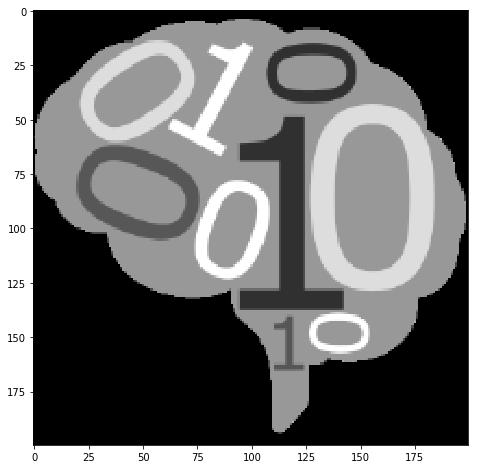

In [225]:
plt.imshow(sitk.GetArrayViewFromImage(img), cmap='gray')
plt.show()

In [226]:
sample_transform = sitk.AffineTransform(2)


In [227]:
sample_transform.SetParameters([1.5, 0.5, 0.0, 1.2, -60.0, -30.0])

In [228]:
img_transformed = registerer.resample(img, sample_transform, img, default_value=0)

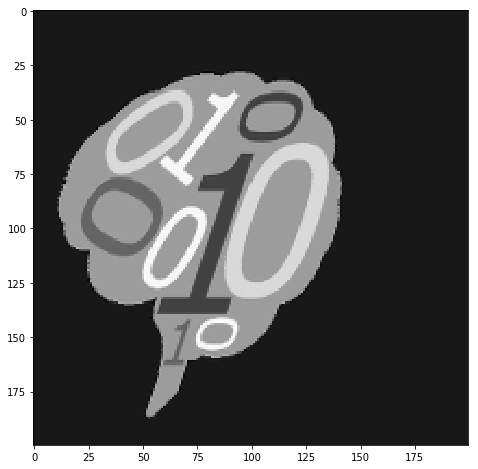

In [229]:
plt.imshow(sitk.GetArrayViewFromImage(img_transformed), cmap='gray')
plt.show()

In [250]:
img_transformed_np = skimage.util.img_as_uint(sitk.GetArrayFromImage(img_transformed))

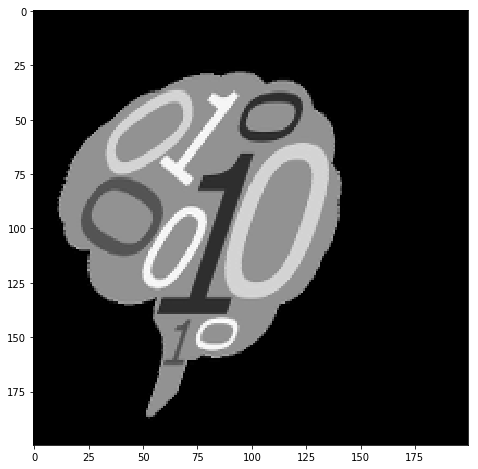

In [251]:
plt.imshow(img_transformed_np, cmap='gray')
plt.show()

In [252]:
sitk.WriteImage(sitk.GetImageFromArray(img_transformed_np), 'neurodata_transformed.png')

In [242]:
img_checker1 = sitk.CheckerBoard(img, img_transformed, [8,8])

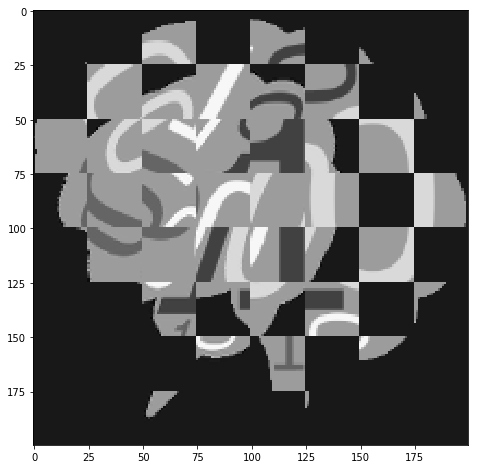

In [243]:
plt.imshow(sitk.GetArrayViewFromImage(img_checker1), cmap='gray')
plt.show()

## Registration

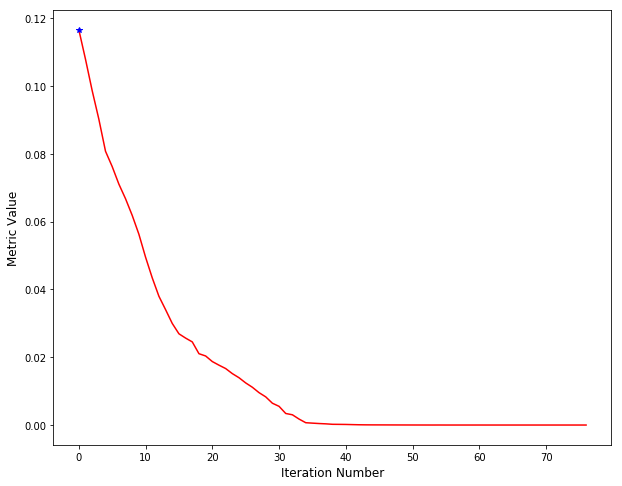

In [230]:
final_transform = registerer.register_affine(img, img_transformed, learning_rate=4.0)

In [235]:
corrected_img = registerer.resample(img, final_transform, img_transformed)

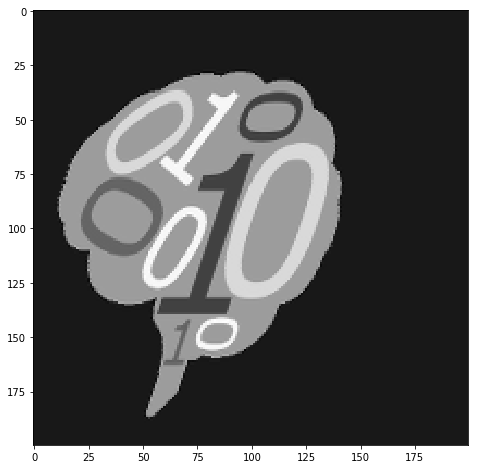

In [236]:
plt.imshow(sitk.GetArrayViewFromImage(corrected_img), cmap='gray')
plt.show()

In [239]:
img_checker = sitk.CheckerBoard(img_transformed, corrected_img, [16,16])

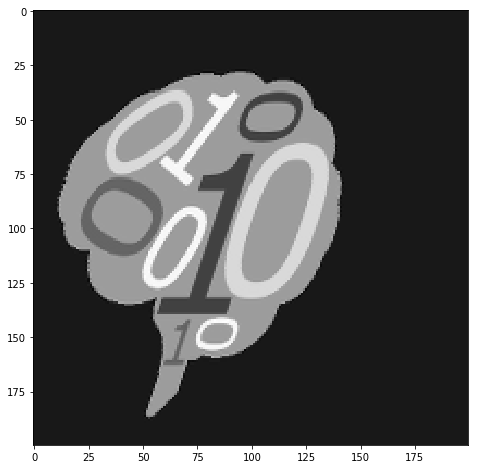

In [241]:
plt.imshow(sitk.GetArrayViewFromImage(img_checker), cmap='gray')
plt.show()